In [ ]:
%matplotlib inline

In [9]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from pylab import rcParams
rcParams['figure.figsize'] = 10,10#　大きくしてみた。

## 確率密度関数の書き方<br>
①　実際のデータを作ってみて、ヒストグラム→カーネル密度関数を描いてみる<br>
②　カーネル密度関数の推定方法の紹介<br>
③　*①*のデータを*②*の各方法で作成

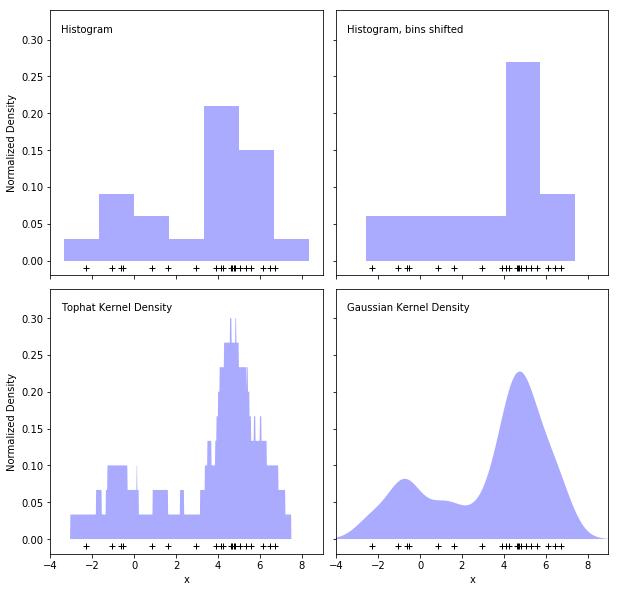

In [13]:
#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)#seedの設定
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#2個以上の配列を軸指定して結合する、正規分布に従う乱数を出力するには、 numpy.random.normal(平均, 分散, 出力する件数) int()で整数変換
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]#一つ次元を追加しておく
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]#等差数列：from,to,1000等分
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)#subplot(行数, 列数)で座標を先に確保.True or ‘all’: x- or y-axis will be shared among all subplots.
fig.subplots_adjust(hspace=0.05, wspace=0.05)#プロット図を縮小して空き(余白)を作る


# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html
log_dens = kde.score_samples(X_plot)# score_samples(X)	Evaluate the density model on the data.(dataからdensityを返す)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')


Text(0.5,1,'Available Kernels')

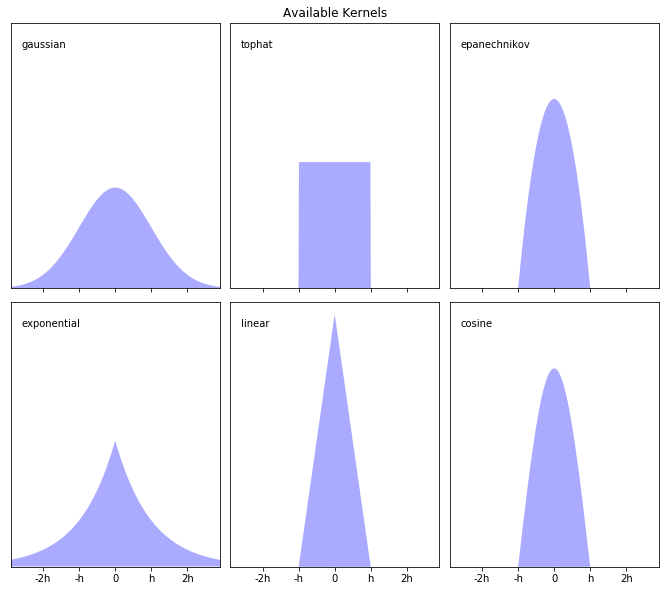

In [11]:
#----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')


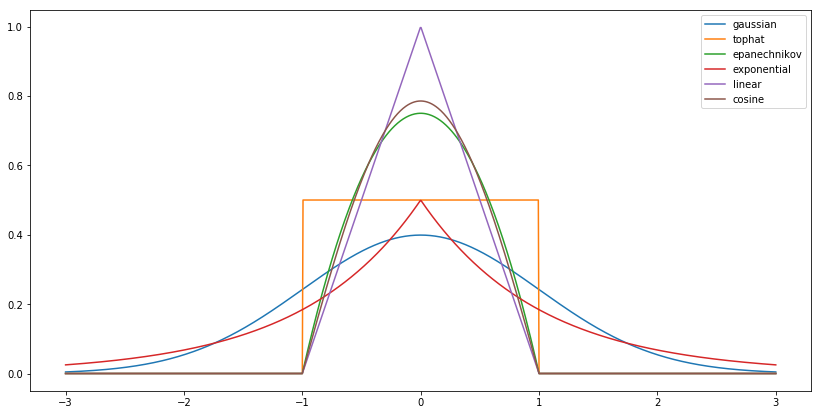

In [14]:
#こんなのも見つけた：https://vaaaaaanquish.hatenablog.com/entry/2017/10/29/181949
# Kearnels
plt.figure(figsize=(14, 7))
plt.grid(color='white', linestyle='-', linewidth=2)
X_src = np.zeros((1, 1))
x_grid = np.linspace(-3, 3, 1000)
for kernel in ['gaussian', 'tophat', 'epanechnikov',
               'exponential', 'linear', 'cosine']:
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
    plt.plot(x_grid, np.exp(log_dens), label=kernel)
plt.legend()
plt.show()

参考 http://scikit-learn.org/stable/modules/density.html#kernel-density-estimation<br>

Gaussian kernel (kernel = 'gaussian')

$$K(x; h) \propto \exp(- \frac{x^2}{2h^2} )$$

Tophat kernel (kernel = 'tophat')

$$K(x; h) \propto 1   \quad  if \quad   x < h$$

Epanechnikov kernel (kernel = 'epanechnikov')

$$K(x; h) \propto 1 - \frac{x^2}{h^2}$$

Exponential kernel (kernel = 'exponential')

$$K(x; h) \propto \exp(-x/h)$$

Linear kernel (kernel = 'linear')

$$K(x; h) \propto 1 - x/h   \quad   if  \quad    x < h$$

Cosine kernel (kernel = 'cosine')

$$K(x; h) \propto \cos(\frac{\pi x}{2h})   \quad   if   \quad   x < h$$


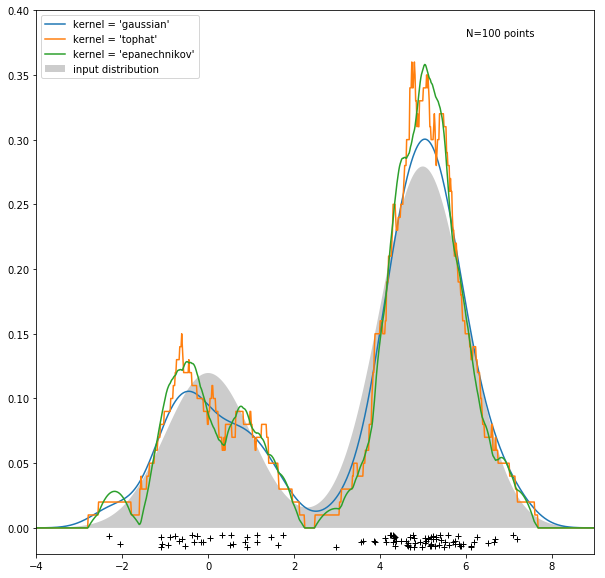

In [12]:
#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()